# **CS240 TERM PROJECT**

# **GROUP MEMBER**

1. นาย จุติณัฏฐ์ รัตนะมงคลกุล 6609650228
2. นาย ภูวฤทธิ์ เจริญพล 6609650590
3. นาย รพินทร์ นะราช 6609650624
4. นาย ศุภณัฐ ตั้งกิจวุฒิกุล 6609650665
5. นาย สุทธิพจน์ ประทุมทอง 6609650699
6. นาย สุรบดี ผาสุข 6609650707
7. นาย เสฎฐวุฒิ วิจิตรศิลป์ 6609650723




# **LOAD LIBRARIES**

In [ ]:
#LOAD LIBRARIES
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# **PROBLEM FRAMING AND DATA COLLECTION**




In [ ]:
#LOAD DATASET HEART FAILURE CLINICAL RECORDS
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"
data = pd.read_csv(url)

In [ ]:
#DISPLAY DATASET
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
#DISPLAY FIRST FIVE ROWS OF THE DATASET
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
#FETCH THE DIMENSIONS OF DATA (299 ROWS AND 13 COLUMNS)
data.shape

(299, 13)

In [ ]:
#DISPLAY TYPE OF DATA
data.dtypes

,0
age,float64
anaemia,int64
creatinine_phosphokinase,int64
diabetes,int64
ejection_fraction,int64
high_blood_pressure,int64
platelets,float64
serum_creatinine,float64
serum_sodium,int64
sex,int64


data description

age:

-description: age of the patient (years)

-type: Numerical


anaemia:

-description:  decrease of red blood cells or hemoglobin

-type: Categorical(1=Hemoglobin is decreased,0=normal)


creatine_phosphokinase:

-description:  The level of creatine phosphokinase (CPK) in the blood,  Elevated levels can indicate muscle damage, including cardiac muscle injury. (mcg/L)

-type: Numerical


diabetes:

-description: Indicates presence (1) or absence (0) of diabetes, a risk factor for heart disease.

-type: Categorical


ejection_fraction:

-description: percentage of blood leaving the heart at each contraction

-type: Numerical


high_blood_pressure:

-description: 	if the patient has hypertension(high blood pressure)

-type:Categorical (1=has high blood pressure,0=normal)


platelets:

-description: platelets in the blood	(kiloplatelets/mL)

-type:Numerical


serum_creatine:

-description: level of serum creatinine in the blood	(mg/dL)

-type:Numerical

serum_sodium:

-description: level of serum sodium in the blood (mEq/L)

-type:Numerical

sex:

description: 	woman or man

-type:Categorical (0=man,1=woman)

smoking:

description: 	if the patient smokes or not

-type: Categorical

time:

description: follow-up period

-type: Numerical

death_event:

description: if the patient died during the follow-up period

-type: Categorical




In [ ]:
#DISPLAY DATA STATISTICAL SUMMARY
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
categorical_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
for col in categorical_columns:
  data[col].value_counts()

In [ ]:
data[col].value_counts()

,count
DEATH_EVENT,
0,203
1,96


# **DATA PREPARATION**

In [ ]:
# To check the number of duplicate values
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
294,False
295,False
296,False
297,False


In [ ]:
# To see how many duplicate value
data.duplicated().sum()

0

There is no duplicate values.

In [ ]:
# Find unique values in every column from the dataset
for i in data.columns:
  print({f"{i} : {data[i].unique()}"})

{'age : [75.    55.    65.    50.    90.    60.    80.    62.    45.    49.\n 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.\n 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.\n 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.\n 60.667 73.    77.    78.    54.    47.    56.   ]'}
{'anaemia : [0 1]'}
{'creatinine_phosphokinase : [ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168\n   80  379  149  125   52  128  220   63  148  112  122   60   70   23\n  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577\n   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250\n  110  161  113 5882  224   92  102  203  336   76   55  280   78   84\n  115   66  897  154  144  133  514   59  156   61  305  898 5209   53\n  328  748 1876  936  292  369  143  754  400   96  737  358  200  248\n  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185\n  132 1610 2261  233   30 1846  335   

There is no inconsistent values.

In [ ]:
# Check number of missing values
data.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


There is no missing values.

# **DATA INTERPRETATION AND DATA VISUALIZATION**

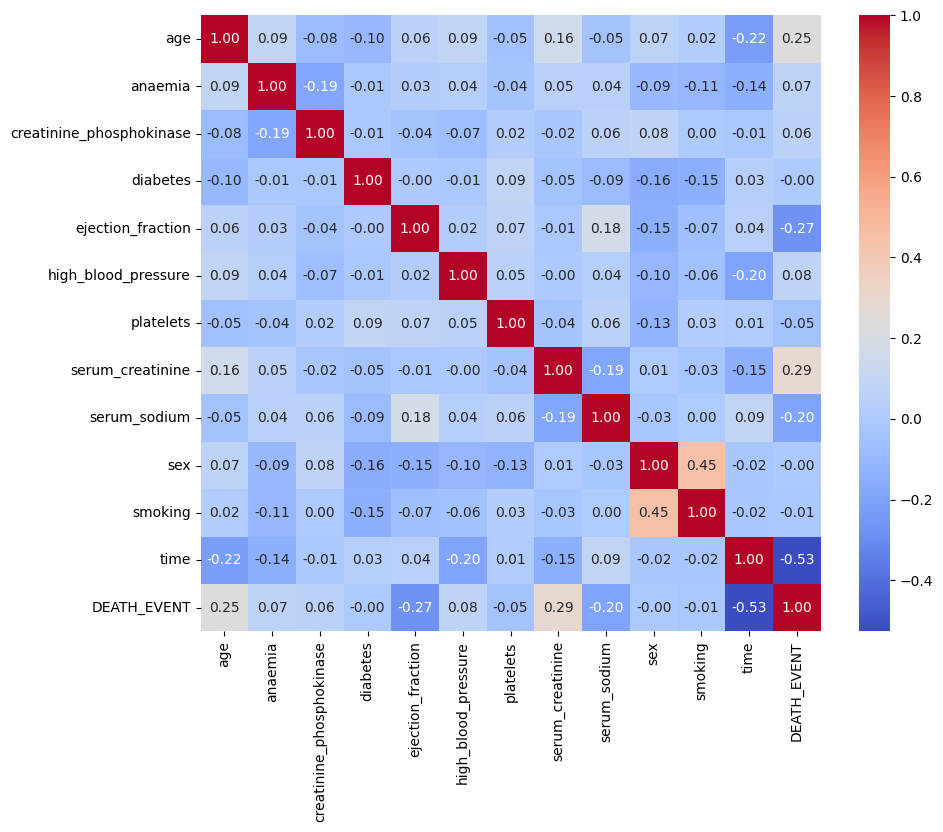

In [ ]:
#Correlation Heatmap between all the features
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

จากกราฟ Heatmap แสดงให้เห็นว่า
*   ตัวแปร serum_creatinine (0.29) มีความสัมพันธ์เชิงบวกกับตัวแปร DEATH_EVENT มากที่สุด แสดงให้เห็นว่ามีแนวโน้มในการเสียชีวิตมากขึ้น
*   ตัวแปร time (-0.53) มีมีความสัมพันธ์เชิงลบกับตัวแปร DEATH_EVENT น้อยสุด แสดงให้เห็นว่ามีแนวโน้มลดความเสี่ยงต่อการเสียชีวิต
*   ตัวแปร sex และ smoking มีความสัมพันธ์เชิงบวก (0.45) แสดงให้เห็นว่าเพศเป็นปัจจัยที่ส่งผลต่อแนวโน้มการสูบบุหรี่ของผู้ป่วย



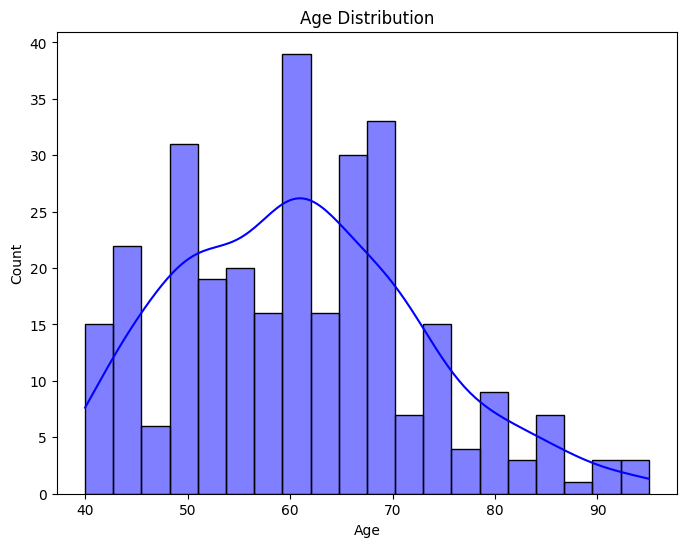

In [ ]:
#Histogram for "Age Distribution"
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

จากกราฟ Histogram แสดงให้เห็นว่า
*   ช่วงอายุที่พบมากที่สุดจะอยู่ในช่วงอายุ 60 ปี ประมาณ 35 - 40 คน
*   กลุ่มคนในช่วงอายุ 50-70 ปี เป็นกลุ่มที่พบได้บ่อยที่สุดในข้อมูล
*   กลุ่มคนอายุน้อยกว่า 50 ปี และมากกว่า 80 ปี มีค่อนข้างน้อย



<ipython-input-58-470eec160436>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='pastel')


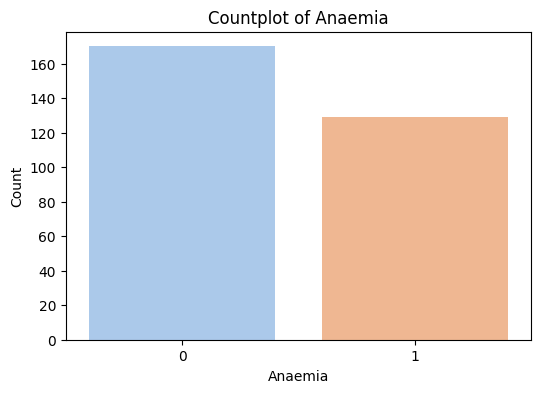

<ipython-input-58-470eec160436>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='pastel')


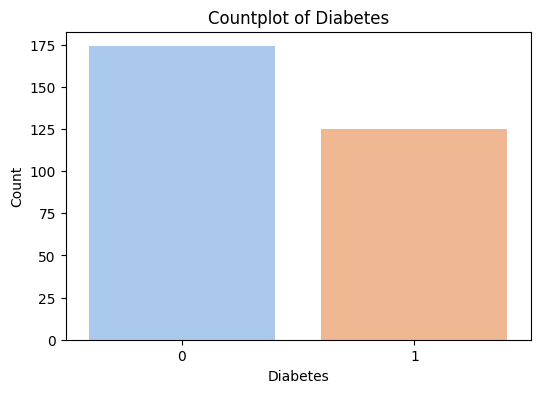

<ipython-input-58-470eec160436>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='pastel')


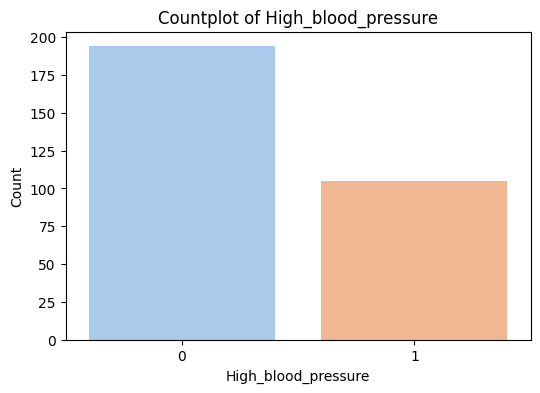

<ipython-input-58-470eec160436>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='pastel')


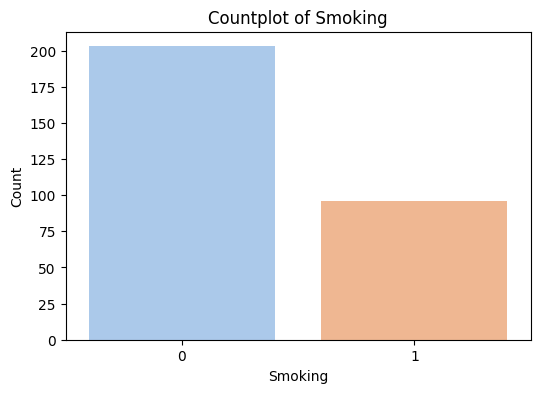

<ipython-input-58-470eec160436>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='pastel')


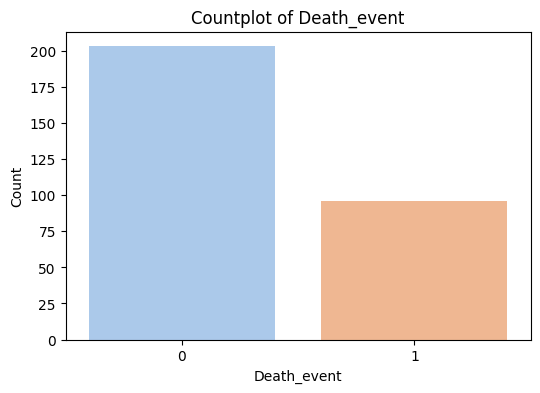

In [ ]:
#Show Countplot of categorical column
categorical_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT']
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col, palette='pastel')
    plt.title(f'Countplot of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.show()

Countplot of Diabetes (เบาหวาน)
*   จำนวนคนที่ไม่เป็นเบาหวาน (0) มีมากกว่าคนที่เป็นเบาหวาน (1)

Countplot of High_blood_pressure (ความดันโลหิตสูง)
*   คนส่วนใหญ่ไม่มีความดันโลหิตสูง (0)แต่ก็ยังมีคนกลุ่มหนึ่งที่มีความดันโลหิตสูง (1) ในระดับที่สังเกตได้

Countplot of Smoking (การสูบบุหรี่)
*   คนส่วนใหญ่ในกลุ่มตัวอย่างไม่ได้สูบบุหรี่ (0) แต่ยังมีกลุ่มคนที่สูบบุหรี่ (1) ซึ่งอาจต้องพิจารณาความสัมพันธ์ระหว่างการสูบบุหรี่กับปัจจัยสุขภาพอื่น ๆ

Countplot of Death_event (การเสียชีวิต)
*   กลุ่มคนที่ยังไม่เสียชีวิต (0) มีจำนวนมากกว่ากลุ่มคนที่เสียชีวิต (1) ในจำนวนที่น่าสังเกต ซึ่งอาจต้องพิจารณาความสัมพันธ์กับปัจจัยเสี่ยงอื่น ๆ เช่น เบาหวาน ความดันโลหิตสูง หรือการสูบบุหรี่










# **SUPERVISE LEARNING: CLASSIFICATION MODELS**

#**RANDOM FOREST MODEL**
* Random Forest Classifier for predicting death from heart failure.

In [ ]:
# We will predict death event in column "DEATH_EVENT"
X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#DISPLAY X_train
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
6,75.000,1,246,0,15,0,127000.00,1.20,137,1,0,10
183,75.000,0,99,0,38,1,224000.00,2.50,134,1,0,162
185,60.667,1,104,1,30,0,389000.00,1.50,136,1,0,171
146,52.000,0,132,0,30,0,218000.00,0.70,136,1,1,112
30,94.000,0,582,1,38,1,263358.03,1.83,134,1,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...
188,60.667,1,151,1,40,1,201000.00,1.00,136,0,0,172
71,58.000,0,582,1,35,0,122000.00,0.90,139,1,1,71
106,55.000,0,748,0,45,0,263000.00,1.30,137,1,0,88
270,44.000,0,582,1,30,1,263358.03,1.60,130,1,1,244


In [ ]:
#DISPLAY y_train
y_train

,DEATH_EVENT
6,1
183,1
185,1
146,0
30,1
...,...
188,0
71,0
106,0
270,0


In [ ]:
#DISPLAY X_test
X_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
281,70.0,0,582,0,40,0,51000.00,2.70,136,1,1,250
265,50.0,1,298,0,35,0,362000.00,0.90,140,1,1,240
164,45.0,0,2442,1,30,0,334000.00,1.10,139,1,0,129
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10
77,42.0,0,102,1,40,0,237000.00,1.20,140,1,0,74
278,50.0,1,1051,1,30,0,232000.00,0.70,136,0,0,246
93,60.0,1,154,0,25,0,210000.00,1.70,135,1,0,82
109,45.0,0,292,1,35,0,850000.00,1.30,142,1,1,88
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8
173,50.0,1,115,0,20,0,189000.00,0.80,139,1,0,146


In [ ]:
#DISPLAY y_test
y_test

,DEATH_EVENT
281,0
265,0
164,1
9,1
77,0
278,0
93,1
109,0
5,1
173,0


In [ ]:
#  Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
#Prediction values
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
#Actual values
y_test.shape

(60,)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.75
Confusion Matrix:
[[33  2]
 [13 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



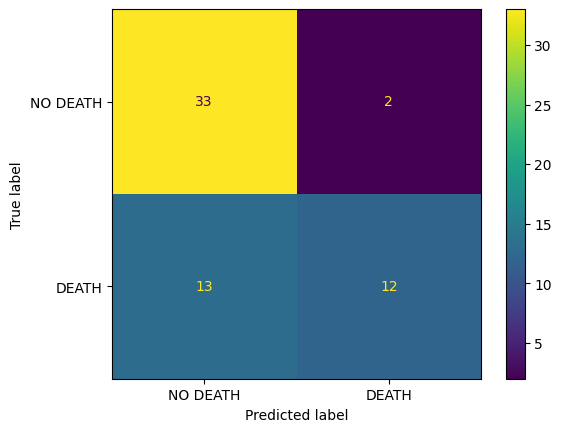

In [ ]:
# Visualize confusion matrix
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=['NO DEATH', 'DEATH'])
conf_matrix_display.plot()

สรุปผลสำหรับ Random Forest:

ภาพรวม:

โมเดลมีความแม่นยำรวม 75% และในการทำนาย "ไม่มีการตาย" (class 0) Recall สูงถึง 0.94

จุดเด่น:

Precision สำหรับ "การตาย" (class 1) สูงถึง 0.88 ชี้ว่าโมเดลทำนาย "การตาย" จะมีความถูกต้องสูง
Recall สำหรับ "ไม่มีการตาย" (class 0) สูงถึง 0.94 สามารถระบุกรณีที่ไม่มีการตายได้อย่างแม่นยำ


จุดอ่อน:

Recall สำหรับ "การตาย" (class 1) ที่ 0.60 หมายถึงโมเดลพลาดกรณีการตายไปถึง 40% ซึ่งสำคัญในความต้องการความแม่นยำสูง
F1-score สำหรับ "การตาย" (class 1) คือ 0.71 แสดงถึงความสมดุลที่พอประมาณระหว่าง Precision และ Recall แต่ต้องปรับปรุง Recall ให้ดีขึ้นสำหรับการทำนาย "การตาย"


สรุป:
โมเดล Random Forest มีประสิทธิภาพในการทำนาย "ไม่มีการตาย" แต่ยังมีข้อจำกัดในการทำนาย "การตาย" เนื่องจาก Recall สำหรับ "การตาย" (class 1) ค่อนข้างต่ำ (0.60) โมเดลนี้อาจได้รับประโยชน์จากการปรับสมดุลของคลาส การปรับจูนพารามิเตอร์ หรือการใช้โมเดลที่มีความไวสูงขึ้นในการทำนายเหตุการณ์ที่หายาก เช่น "การตาย"

# **NAIVE BAYES MODEL**
* Naive Bayes Classifier for predicting death for heart failure.

In [ ]:
# We will predict death event in column "DEATH_EVENT"
X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# DISPLAY X_train
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
6,75.000,1,246,0,15,0,127000.00,1.20,137,1,0,10
183,75.000,0,99,0,38,1,224000.00,2.50,134,1,0,162
185,60.667,1,104,1,30,0,389000.00,1.50,136,1,0,171
146,52.000,0,132,0,30,0,218000.00,0.70,136,1,1,112
30,94.000,0,582,1,38,1,263358.03,1.83,134,1,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...
188,60.667,1,151,1,40,1,201000.00,1.00,136,0,0,172
71,58.000,0,582,1,35,0,122000.00,0.90,139,1,1,71
106,55.000,0,748,0,45,0,263000.00,1.30,137,1,0,88
270,44.000,0,582,1,30,1,263358.03,1.60,130,1,1,244


In [ ]:
# DISPLAY y_train
y_train

,DEATH_EVENT
6,1
183,1
185,1
146,0
30,1
...,...
188,0
71,0
106,0
270,0


In [ ]:
# DISPLAY X_test
X_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
281,70.0,0,582,0,40,0,51000.00,2.70,136,1,1,250
265,50.0,1,298,0,35,0,362000.00,0.90,140,1,1,240
164,45.0,0,2442,1,30,0,334000.00,1.10,139,1,0,129
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10
77,42.0,0,102,1,40,0,237000.00,1.20,140,1,0,74
278,50.0,1,1051,1,30,0,232000.00,0.70,136,0,0,246
93,60.0,1,154,0,25,0,210000.00,1.70,135,1,0,82
109,45.0,0,292,1,35,0,850000.00,1.30,142,1,1,88
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8
173,50.0,1,115,0,20,0,189000.00,0.80,139,1,0,146


In [ ]:
# DISPLAY y_test
y_test.shape

(60,)

In [ ]:
# Train the Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Make predictions on the test set
y_pred = nb_model.predict(X_test)

In [ ]:
# Prediction values
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
# Actual values
y_test.shape

(60,)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.7333333333333333
Confusion Matrix:
[[34  1]
 [15 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.97      0.81        35
           1       0.91      0.40      0.56        25

    accuracy                           0.73        60
   macro avg       0.80      0.69      0.68        60
weighted avg       0.78      0.73      0.70        60



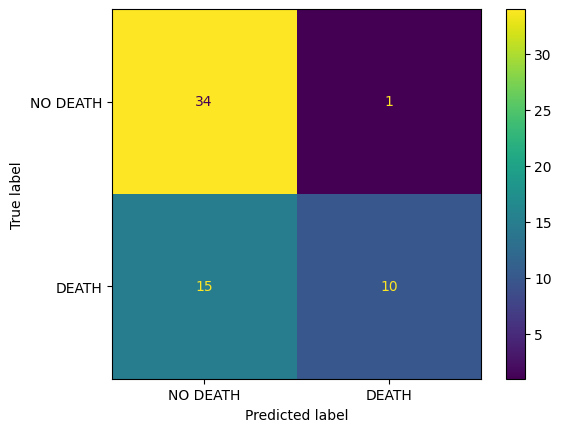

In [ ]:
# Visualize confusion matrix
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=['NO DEATH', 'DEATH'])
conf_matrix_display.plot()

สรุปผลสำหรับ Naive Bayes:

ภาพรวม:

โมเดลมีความแม่นยำรวม 73% ซึ่งต่ำกว่าโมเดล Random Forest เล็กน้อย โมเดลนี้ทำนาย "ไม่มีการตาย" (class 0) ได้ดีมาก Recall 0.97 ซึ่งโมเดลสามารถทำนายกรณี "ไม่มีการตาย" ได้อย่างแม่นยำเกือบทั้งหมด

จุดเด่น:

Recall สำหรับ "ไม่มีการตาย" (class 0) อยู่ที่ 0.97 ทำให้โมเดลทำนาย "ไม่มีการตาย" ได้ถูกต้องเกือบทั้งหมด
Precision สำหรับ "การตาย" (class 1) สูงถึง 0.91 ทำให้การทำนาย "การตาย" จะมีความถูกต้องสูง

จุดอ่อน:

Recall สำหรับ "การตาย" (class 1) อยู่ที่ 0.40 พลาดการทำนาย 60% ของกรณีการตาย ซึ่งมีความร้ายแรงในกรณีที่การทำนายการตายมีความสำคัญ
F1-score สำหรับ "การตาย" (class 1) คือ 0.56 ซึ่งสะท้อนถึงการมีความสมดุลที่ไม่ดีระหว่าง Precision และ Recall สำหรับ class 1 โมเดลมีปัญหาในการทำนายกรณีการตายได้อย่างถูกต้อง

สรุป:

โมเดล Naive Bayes ทำได้ดีในการทำนาย "ไม่มีการตาย" แต่มี Recall ที่ต่ำมากสำหรับ "การตาย" ซึ่งทำให้มีข้อจำกัดในการใช้งานในสถานการณ์ที่ต้องการทำนายเหตุการณ์สำคัญอย่างการวินิจฉัยทางการแพทย์ แม้ว่าจะมี Precision ที่สูงสำหรับการทำนาย "การตาย" แต่โมเดลนี้ยังคงต้องการการปรับปรุงในการจัดการกับคลาสที่ไม่สมดุล หรืออาจใช้เทคนิคที่ซับซ้อนขึ้นในการจัดการกับเหตุการณ์ที่หายาก

# **LOGISTICS REGRESSIONS MODEL**
* Logistics Regressions Classifier for predicting death for heart failure.

In [ ]:
# We will predict death event in column "DEATH_EVENT"
X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# DISPLAY X_train
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
6,75.000,1,246,0,15,0,127000.00,1.20,137,1,0,10
183,75.000,0,99,0,38,1,224000.00,2.50,134,1,0,162
185,60.667,1,104,1,30,0,389000.00,1.50,136,1,0,171
146,52.000,0,132,0,30,0,218000.00,0.70,136,1,1,112
30,94.000,0,582,1,38,1,263358.03,1.83,134,1,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...
188,60.667,1,151,1,40,1,201000.00,1.00,136,0,0,172
71,58.000,0,582,1,35,0,122000.00,0.90,139,1,1,71
106,55.000,0,748,0,45,0,263000.00,1.30,137,1,0,88
270,44.000,0,582,1,30,1,263358.03,1.60,130,1,1,244


In [ ]:
# DISPLAY y_train
y_train

,DEATH_EVENT
6,1
183,1
185,1
146,0
30,1
...,...
188,0
71,0
106,0
270,0


In [ ]:
# DISPLAY X_test
X_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
281,70.0,0,582,0,40,0,51000.00,2.70,136,1,1,250
265,50.0,1,298,0,35,0,362000.00,0.90,140,1,1,240
164,45.0,0,2442,1,30,0,334000.00,1.10,139,1,0,129
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10
77,42.0,0,102,1,40,0,237000.00,1.20,140,1,0,74
278,50.0,1,1051,1,30,0,232000.00,0.70,136,0,0,246
93,60.0,1,154,0,25,0,210000.00,1.70,135,1,0,82
109,45.0,0,292,1,35,0,850000.00,1.30,142,1,1,88
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8
173,50.0,1,115,0,20,0,189000.00,0.80,139,1,0,146


In [ ]:
# DISPLAY y_test
y_test.shape

(60,)

In [ ]:
# Train the Logistic Regression model
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(random_state=42, max_iter=1000)
log_reg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = log_reg_model.predict(X_test)

In [ ]:
# Prediction values
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
# Actual values
y_test.shape

(60,)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8
Confusion Matrix:
[[33  2]
 [10 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60



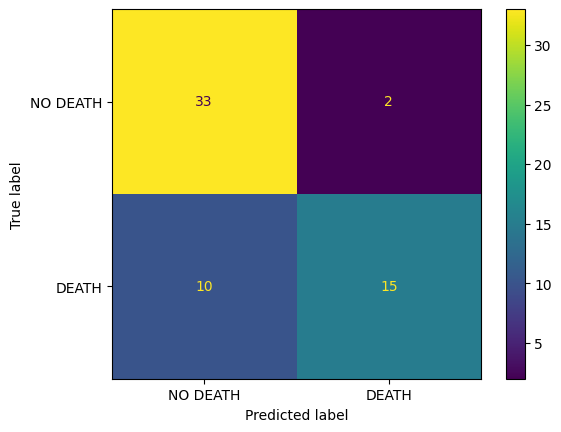

In [ ]:
# Visualize confusion matrix
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=['NO DEATH', 'DEATH'])
conf_matrix_display.plot()

สรุปผลสำหรับ Logistic Regression:

ภาพรวม:

โมเดล Logistic Regression มีความแม่นยำรวม 80% ซึ่งสูงที่สุดในบรรดาโมเดลทั้งสาม โมเดลนี้ทำงานได้ดีในการทำนาย "ไม่มีการตาย" (class 0) โดยมี Recall สูงถึง 0.94 ซึ่งโมเดลมีความสามารถในการระบุกรณี "ไม่มีการตาย" ได้อย่างมีประสิทธิภาพ

จุดเด่น:

Recall สำหรับ "ไม่มีการตาย" (class 0) อยู่ที่ 0.94 ซึ่งโมเดลมีความแข็งแกร่งในการทำนายคลาสหลัก (ไม่มีการตาย)
Precision สำหรับ "การตาย" (class 1) อยู่ที่ 0.88 แสดงถึงการทำนาย "การตาย" ได้อย่างถูกต้อง

จุดอ่อน:

Recall สำหรับ "การตาย" (class 1) อยู่ที่ 0.60 ซึ่งคล้ายกับ Random Forest หมายความว่าโมเดลพลาดกรณีการตายถึง 40% ซึ่งเป็นข้อบกพร่องสำคัญในการทำนายเหตุการณ์สำคัญ เช่น การตาย
F1-score สำหรับ "การตาย" (class 1) คือ 0.71 ซึ่งแสดงให้เห็นว่ายังมีช่องว่างในการปรับปรุงความสมดุลระหว่าง Precision และ Recall สำหรับการทำนาย "การตาย"

สรุป:

โมเดล Logistic Regression มีความแม่นยำรวมที่ดีที่สุด (80%) ในบรรดาโมเดลทั้งสาม และทำงานได้ดีในการทำนาย "ไม่มีการตาย" แต่เหมือนกับ Random Forest โมเดลนี้ยังมี Recall สำหรับ "การตาย" ที่ต่ำ (0.60) ซึ่งหมายความว่ามันพลาดการทำนายเหตุการณ์การตายสำคัญไปมาก โมเดลนี้อาจได้รับประโยชน์จากการใช้เทคนิคที่ซับซ้อนมากขึ้น เช่น การปรับสมดุลของข้อมูล (resampling methods) การใช้การทำ regularization หรือการใช้โมเดลที่ออกแบบมาเพื่อจัดการกับข้อมูลที่ไม่สมดุล